In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [39]:
class Heston:
    def __init__(self, S0=100., mu=0.1, v=0.2, rho=-0.2, kappa=0.7, theta=0.2, xi=0.2, T = 252):
        self.T = T   
        self.dt = 1 / self.T
        self.S0 = S0          # initial price
        self.mu = mu          # Expected return
        self.v = v          # volatility
        self.rho = rho      # correlation
        self.kappa = kappa     # reversion rate
        self.theta = 0.2     # long-term volatility
        self.xi = 0.2        # volatility of instanteneous volatility
        self.v0 = 0.2         # initial instanteneous volatility
        
    def heston_mc(self):
        """Generate Monte Carlo simulation for Heston volatility model."""
        
        S0 = self.S0
        T = self.T
        dt = self.dt
        v0 = self.v0
        rho = self.rho
        kappa = self.kappa
        theta = self.theta
        xi = self.xi
        mu = self.mu
        
        # Brownian motion setup
        MU = np.array([0,0])
        COV = np.matrix([[1, rho], [rho, 1]])
        W = np.random.multivariate_normal(MU, COV, T)
        W_S = W[:, 0]
        W_v = W[:, 1]
        
        # paths
        vt = np.zeros(T)
        vt[0] = v0
        St = np.zeros(T)
        St[0] = S0
        
        for t in range(1, T):
            vt[t] = np.abs(vt[t-1] + kappa*(theta - np.abs(vt[t-1])) * dt + xi * np.sqrt(np.abs(vt[t-1] * dt)) * W_v[t])
            St[t] = St[t-1] * np.exp((mu - 0.5*vt[t]) * dt + np.sqrt(vt[t] * dt) * W_S[t])
        
        return St, vt
    
    
    def plot_process(self):
        
        St, vt = self.heston_mc()
        
        plt.figure()
        plt.plot(St)
        plt.show
        
        plt.figure()
        plt.plot(vt, color='r')
        plt.show
    
        
        

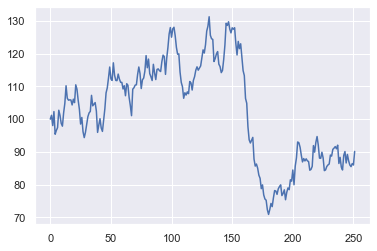

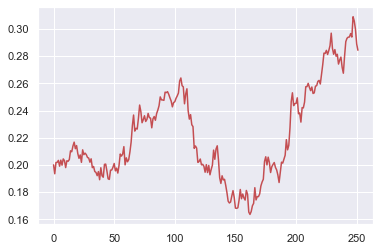

In [40]:
if __name__ == '__main__':
    d = Heston()
    d.plot_process()